<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [2]:
import numpy as np      
import pandas as pd     

import matplotlib.pyplot as plt  

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
# YOUR CODE HERE
past = pd.read_csv('../dat/past.csv.gz')

past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [11]:
# YOUR CODE HERE
# number of values that resulted in purchase
(len(past[past['Purchased?'] == 1]))/(len(past['Purchased?']))
      


0.3438

In [12]:
#Quick check
# percentage of values that resulted in purchase
percentage = (past['Purchased?'] == 1).mean() * 100
print(percentage)

34.38


3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [13]:
# YOUR CODE HERE
X = past.drop(columns=['product_id', 'user_id'])
y = X.pop('Purchased?')
X.head()
X.shape

(5000, 34)

In [14]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [17]:
#We need to scale first 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#then transform to PCA components
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X_scaled)
X_reduced

array([[ 0.56789112, -1.69663782,  1.02393911,  0.15547862, -0.24187917],
       [ 0.45396926,  0.02166744, -0.53834595,  0.04414136, -0.66329591],
       [-0.16092518, -1.15100266, -0.49117498, -0.32655156,  1.4047907 ],
       ...,
       [ 2.13466546, -2.36753487, -0.88536577, -0.76578712, -0.89563866],
       [ 2.46272616, -1.91247424, -0.89159637,  0.16165172, -2.1215798 ],
       [-2.42954248,  0.34389572,  0.04531902, -0.28504691, -0.53039095]])

In [5]:
# # YOUR CODE HERE
# xPCA = PCA(n_components=5)
# X_reduced = xPCA.fit_transform(X)
# # X_reduced = xPCA.transform(X)
# X_reduced.head()

In [18]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [19]:
# YOUR CODE HERE
pca.explained_variance_ratio_

array([0.10282344, 0.09445711, 0.06512683, 0.05144027, 0.04215615])

6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [20]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [21]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

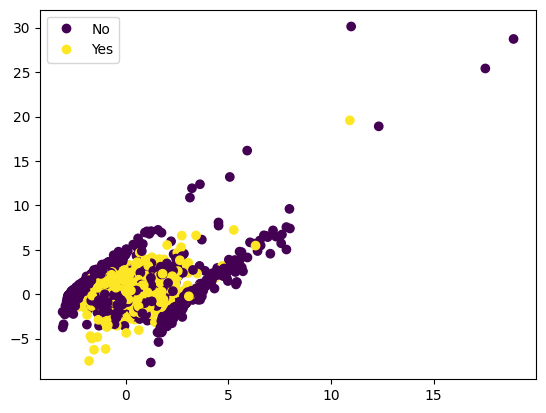

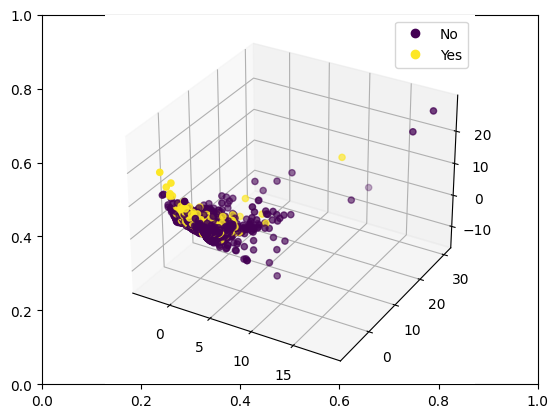

In [23]:
# YOUR CODE HERE
visualize_2pcs(X_reduced, y)
# YOUR CODE HERE
visualize_3pcs(X_reduced, y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [11]:
# YOUR CODE HERE (imports!)

def train(X, y, standardize = True) -> None:
    # YOUR CODE HERE

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

def train(X, y, standardize = True) -> None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    if standardize:
        steps = [('scaler', StandardScaler()), 
                 ('logistic_regression', LogisticRegression())]
    else:
        steps = [('logistic_regression', LogisticRegression())]
    
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))


Now apply the pipeline on the all the features `X` and review the performance

In [25]:
# YOUR CODE HERE
train(X, y, standardize = True)

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       649
           1       0.45      0.11      0.17       351

    accuracy                           0.64      1000
   macro avg       0.55      0.52      0.47      1000
weighted avg       0.58      0.64      0.56      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [26]:
# YOUR CODE HERE
train(X_reduced, y, standardize = False)

              precision    recall  f1-score   support

           0       0.64      0.96      0.77       649
           1       0.04      0.00      0.01       351

    accuracy                           0.62      1000
   macro avg       0.34      0.48      0.39      1000
weighted avg       0.43      0.62      0.50      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*
    
    
    
    In the PCA reduced report, recall for class 0 is higher, while precision, recall and f1-score for class 1 are lower. The overall accuracy, macro average, and weighted average are also slightly higher in the non-reduced dataset.

The pros of using a reduced set of features,is that it can reduce the dimensionality of the data and therefore reduce the cost of compute resources. This can be particularly useful in high-dimensional datasets, where the number of features is much greater than the number of samples. 

On the other hand, the cons of using a reduced set of features are that it may result in loss of information or potentially important features. This can lead to a decrease in model performance. Also reducing the number of features can also make the model less interpretable.


## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [27]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [75]:

def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    ks = range(1,10)
    for k in ks:
        # YOUR CODE HERE
        km = KMeans(n_clusters=k).fit(X)
        # YOUR CODE HERE
        inertias.append(km.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

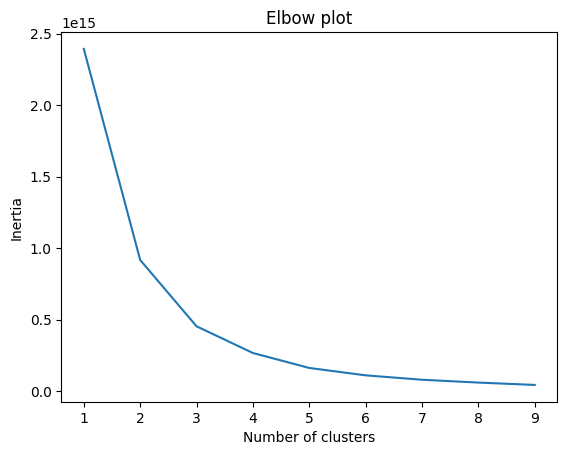

In [74]:
# YOUR CODE HERE
visualize_elbow(X, ks)

4. What are the disadvantage to use the Elbow method? 

    *YOUR ANSWER HERE*
    The elbow method is subjective and can lead to different results based on the interpretation of the plot. It can be difficult to determine the exact point at which the elbow occurs, leading to potential discrepancies in the number of clusters selected.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [76]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.2525934147430897
For n_clusters = 3 The average silhouette_score is : 0.2610197608471796
For n_clusters = 4 The average silhouette_score is : 0.27495744130642724
For n_clusters = 5 The average silhouette_score is : 0.2416182591078634


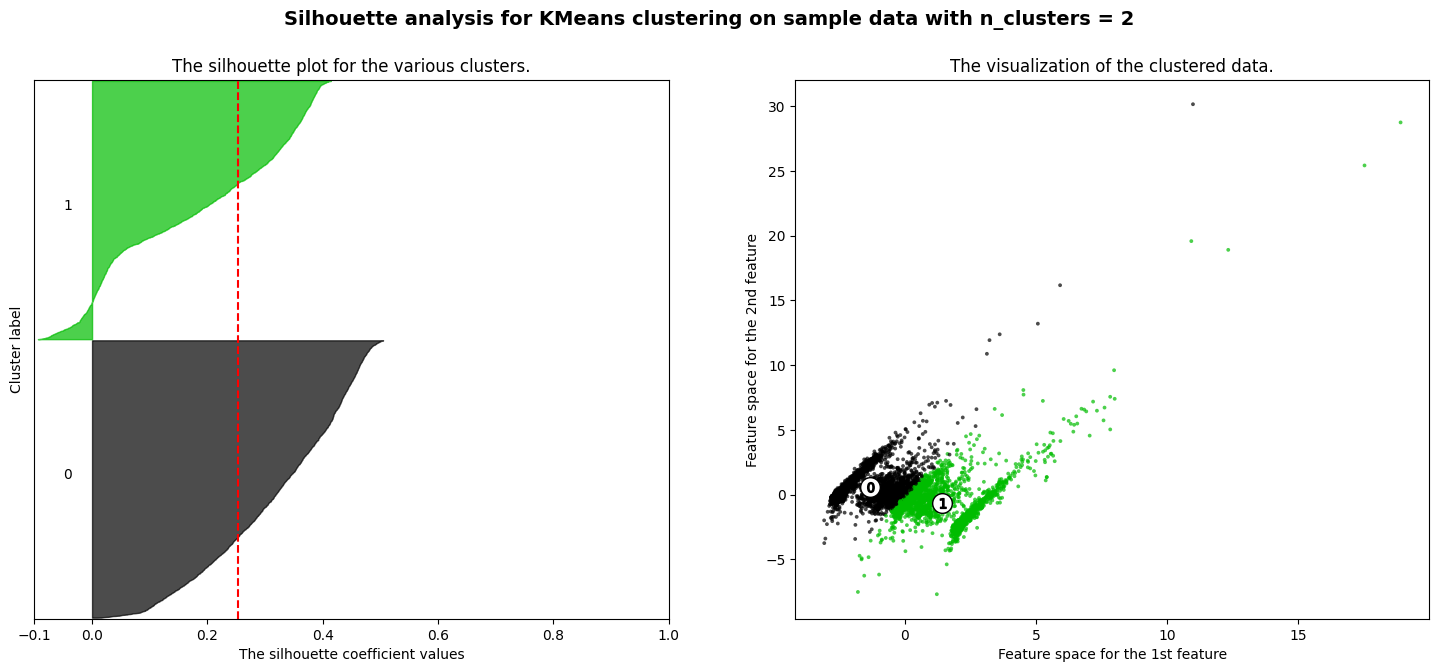

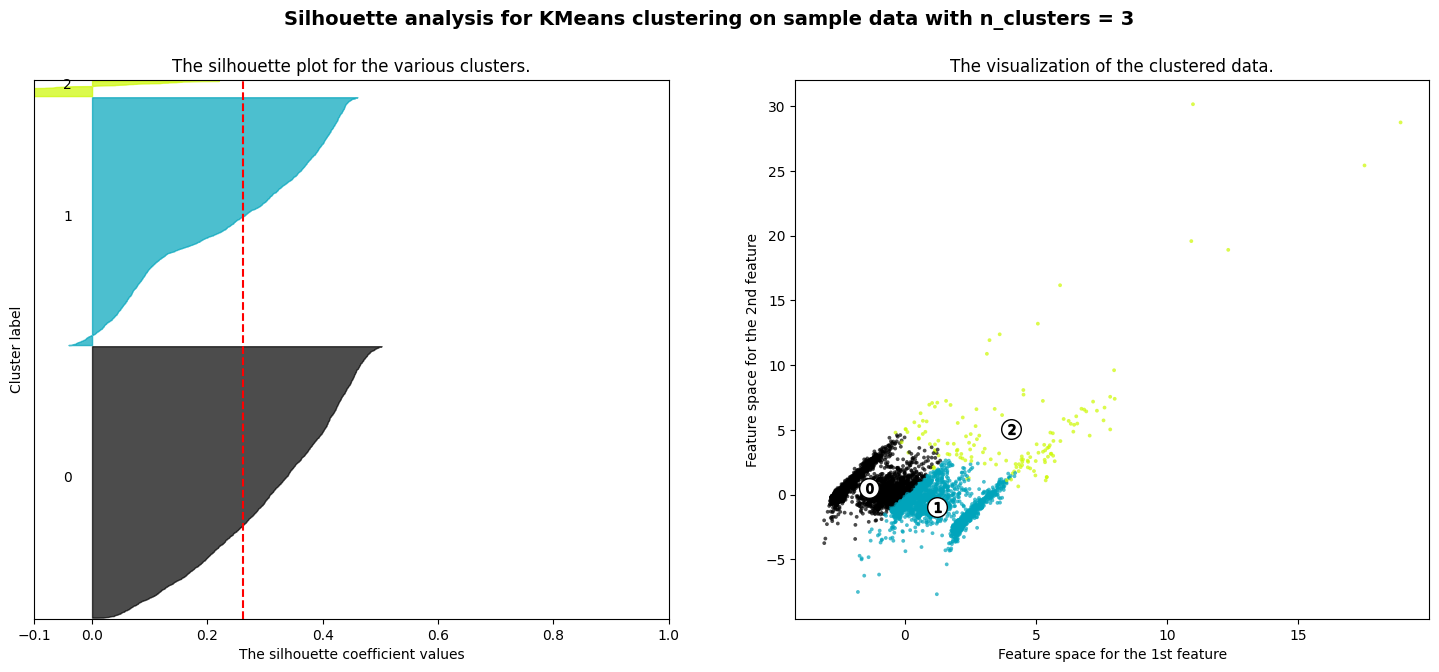

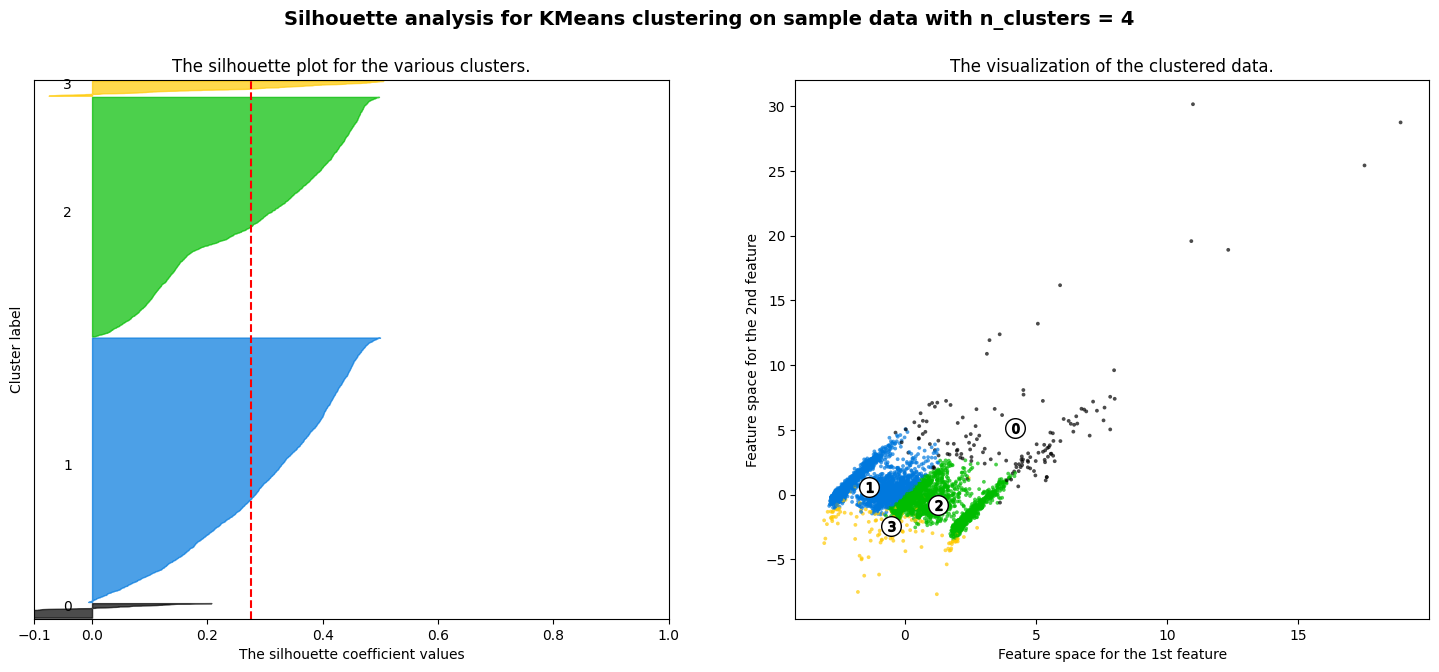

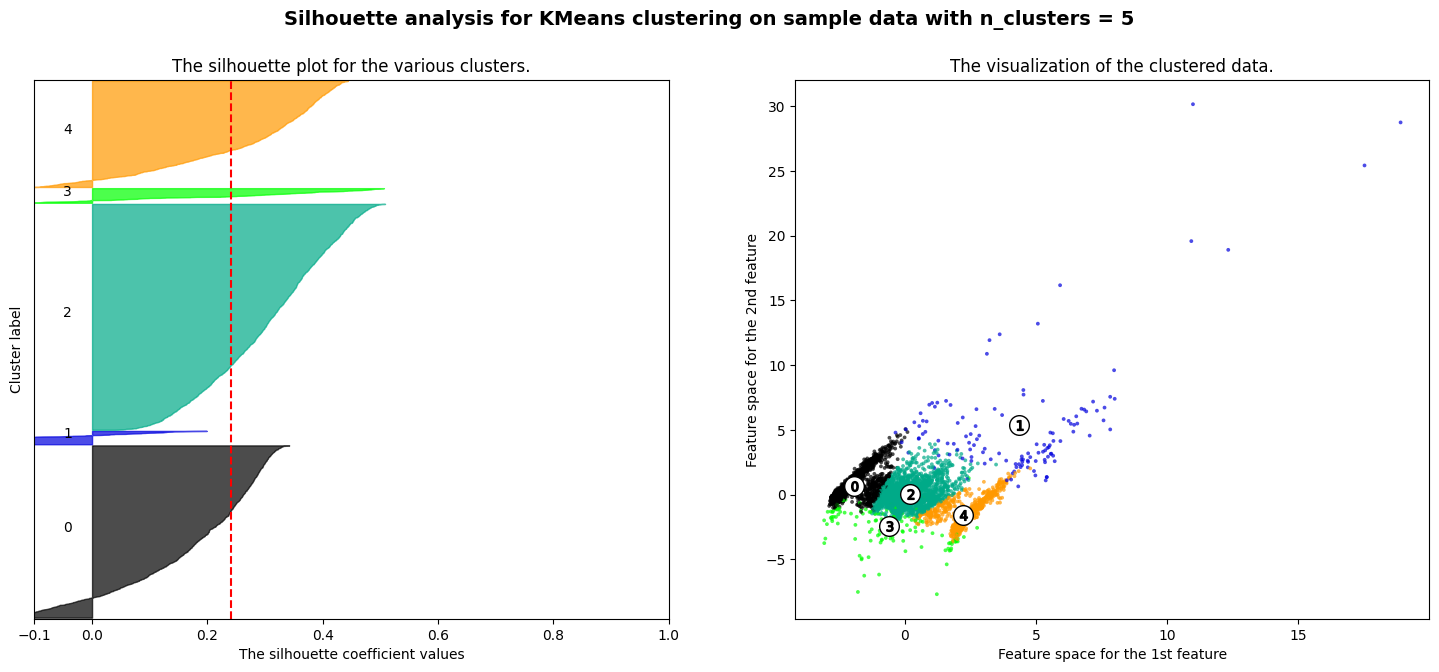

In [78]:
# YOUR CODE HERE
visualize_silhouette(max_clusters =5,X=X_reduced, random_state=10)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [79]:
# YOUR CODE HERE
# 4 clusters
km4 = KMeans(n_clusters=4).fit(X)

7. What is the size of each cluster? 

In [81]:
# YOUR CODE HERE

cluster_labels = km4.labels_
unique_labels = np.unique(cluster_labels)
cluster_sizes = [np.sum(cluster_labels == label) for label in unique_labels]
cluster_sizes


[4153, 683, 35, 129]

8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [93]:
# YOUR CODE HERE
X['cluster_pca'] = km.predict(X_reduced)
X.head()


,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Category,cluster_pca
0,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,0.000,1.000,...,0.00,0.000,0.0,0.666667,0.333333,0.00,0.00,0.00,1.0,4
1,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,3.750,2.250,...,0.25,0.750,0.0,0.000000,0.250000,0.00,0.00,0.00,1.0,4
2,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,17.250,30.000,...,0.00,0.000,0.0,0.000000,0.750000,0.25,0.00,0.00,1.0,4
3,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,3.250,10.500,...,0.25,0.000,0.0,0.000000,0.500000,0.00,0.25,0.25,1.0,4
4,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,4.875,3.375,...,0.25,0.375,0.0,0.125000,0.250000,0.25,0.00,0.00,1.0,4


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

    *YOUR ANSWER HERE*
    
    From the descriptive statistice below ,the mean interaction time is 249023.4 milliseconds, the maximum number of events in a journey is 40, and the maximum price is 236.51. These statistics can help the client understand the general characteristics of their customer interactions, including their behavior, preferences, and spending patterns. 

In [97]:
# # YOUR CODE HERE
# # Calculate the mean of each feature for each cluster
# cluster_means = past.groupby("cluster_pca").mean()

# cluster_means

In [96]:
X.describe()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Category,cluster_pca
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.951080,1.327052,2.490234e+05,7.457600,7.426321,0.541953,0.893687,0.413592,23.010176,15.517297,...,0.169931,0.213311,0.065900,0.162676,0.244012,0.169207,0.085550,0.059343,1.143728,3.833800
std,1.324727,0.718266,6.920382e+05,11.883206,11.876266,0.565350,0.841036,0.772170,70.790104,54.114554,...,0.255599,0.275556,0.172911,0.246050,0.289270,0.252342,0.191101,0.153912,0.438141,2.897353
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000e+00,2.483750,2.480000,0.000000,0.500000,0.000000,2.594231,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.750000,1.166667,3.626375e+03,4.440585,4.440000,0.500000,1.000000,0.222222,9.080715,8.000000,...,0.000000,0.142857,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,1.000000,4.000000
75%,2.308355,1.500000,2.071993e+05,7.620000,7.550000,0.858766,1.000000,0.632775,21.458333,15.666667,...,0.250000,0.333333,0.040000,0.250000,0.363636,0.250000,0.090909,0.041888,1.045996,6.000000
max,40.000000,28.000000,1.087537e+07,236.510000,236.510000,12.000000,28.000000,38.000000,1927.000000,2305.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000


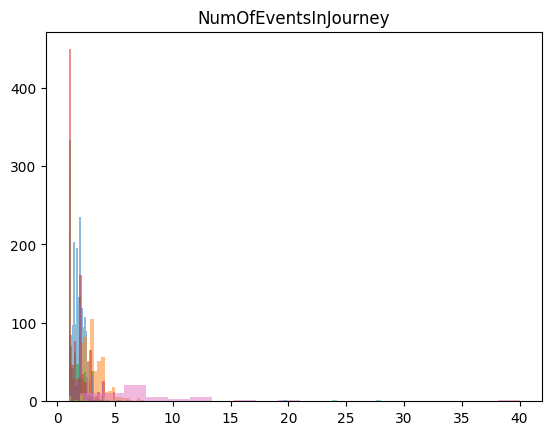

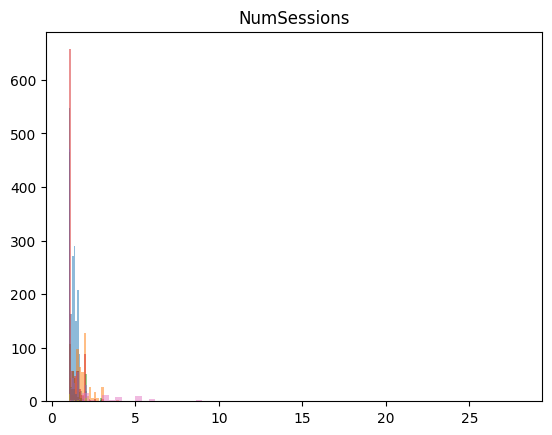

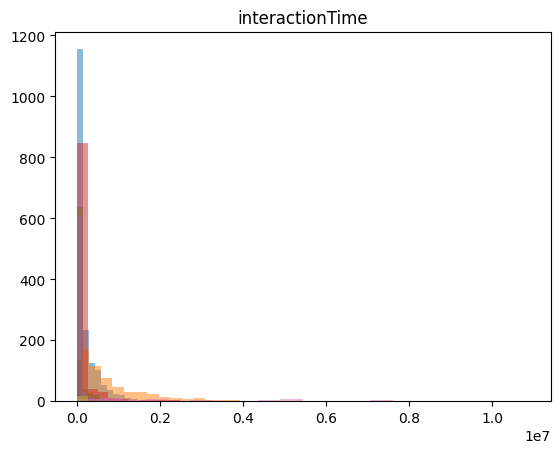

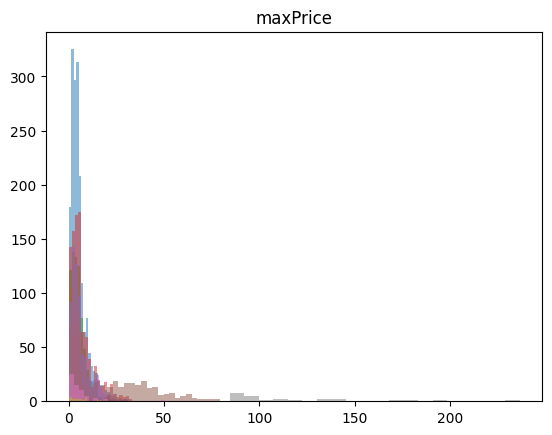

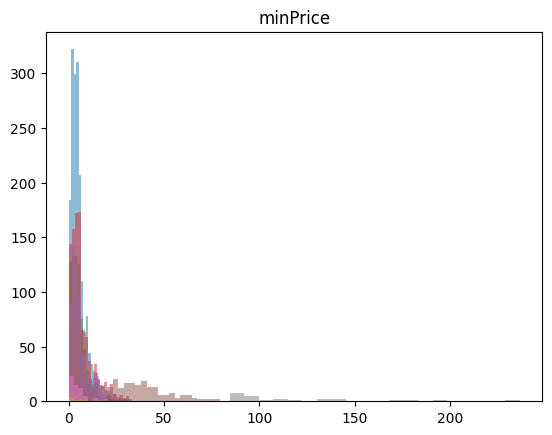

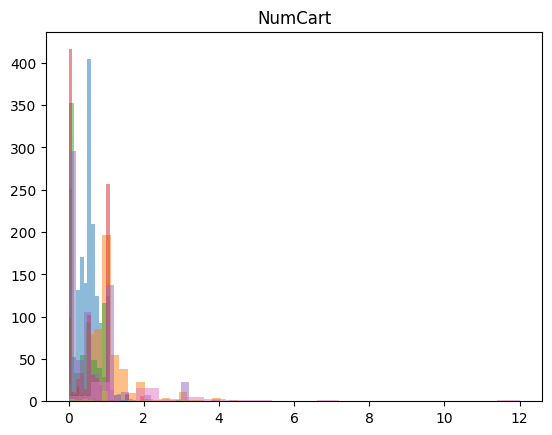

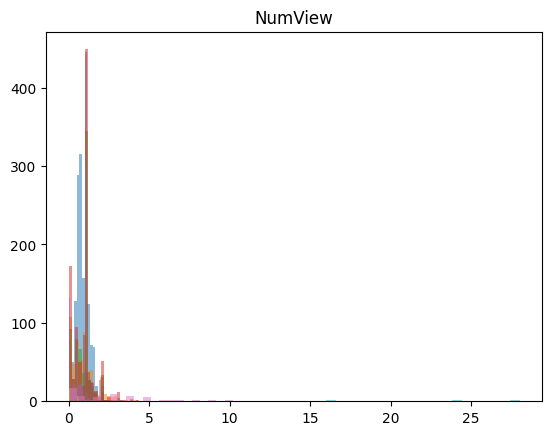

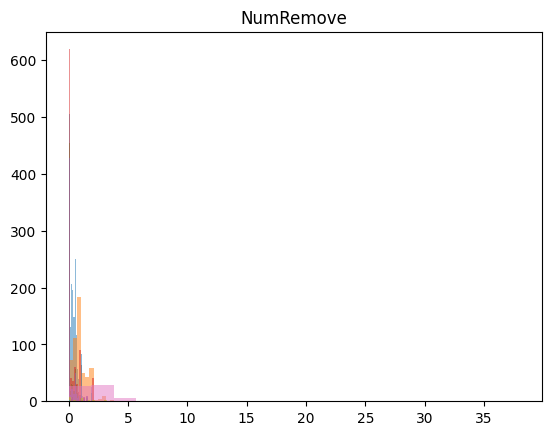

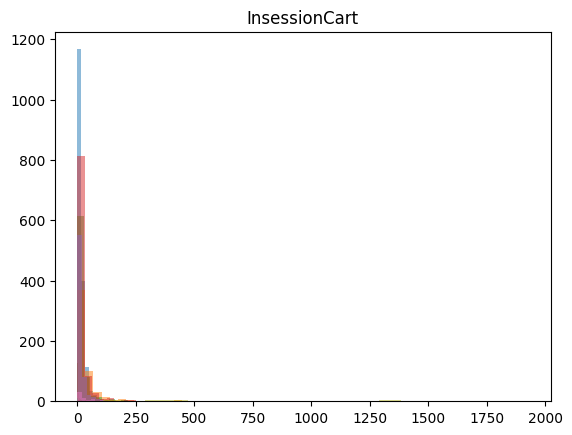

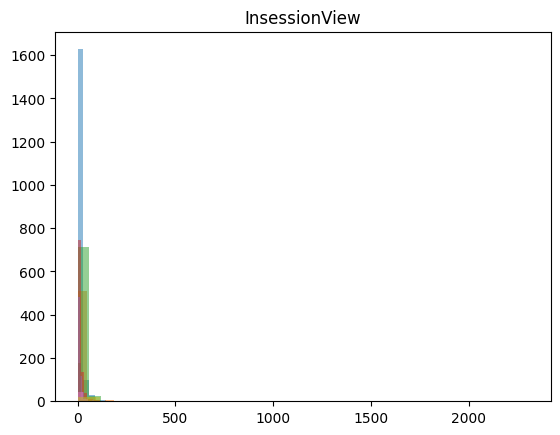

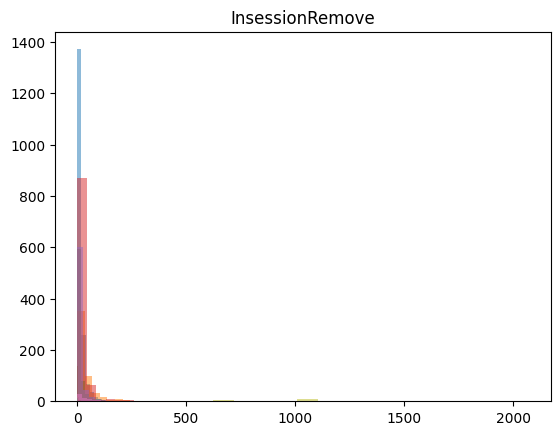

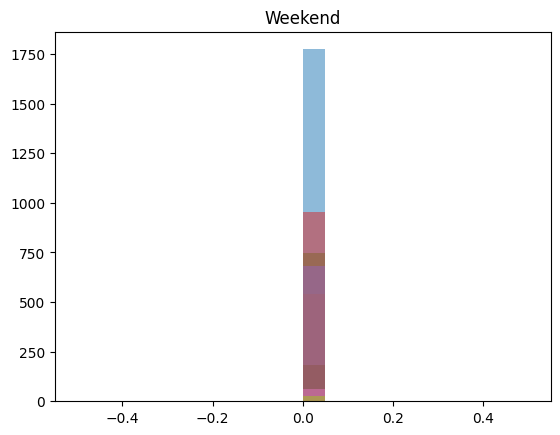

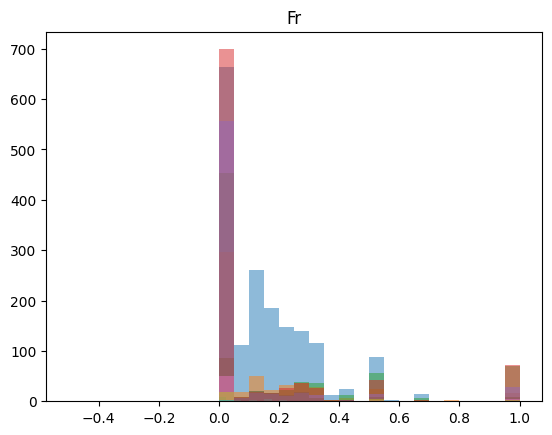

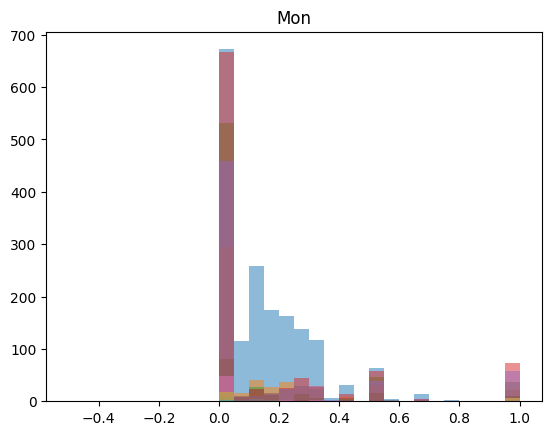

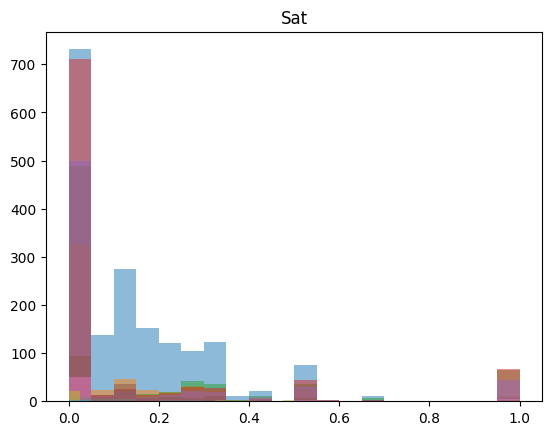

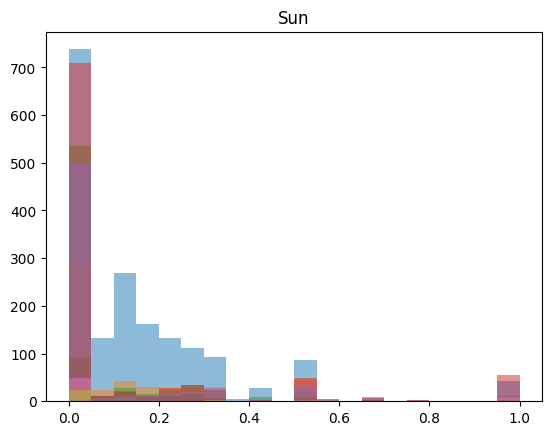

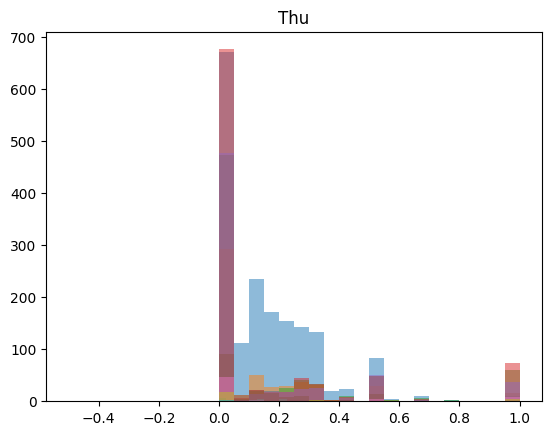

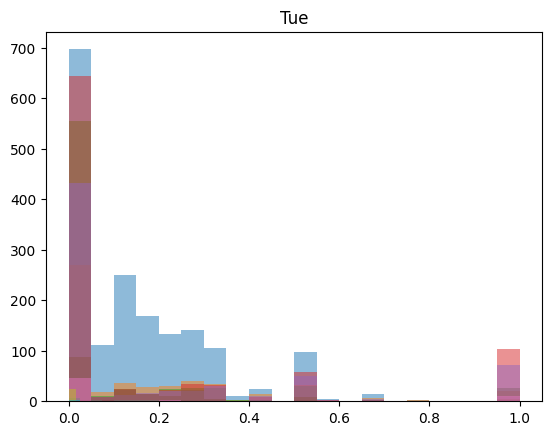

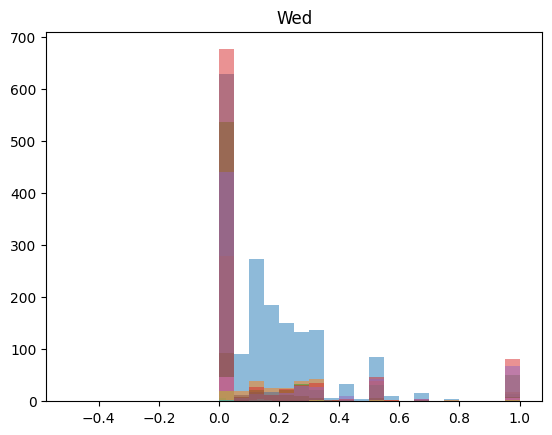

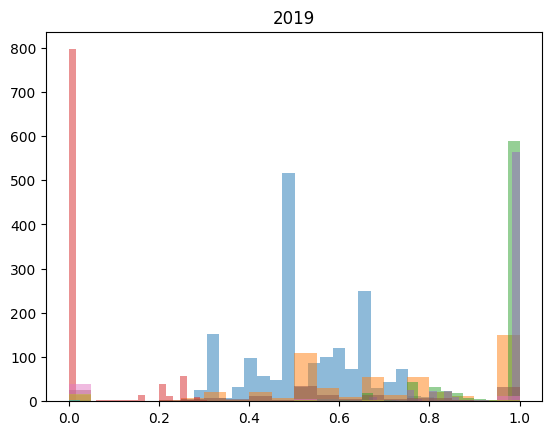

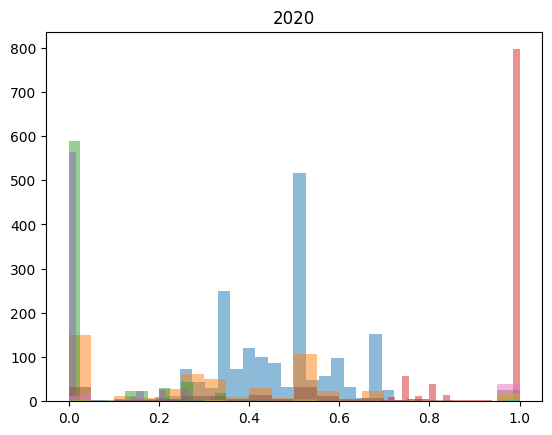

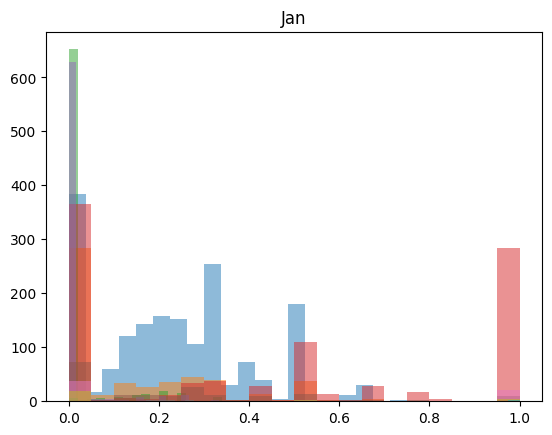

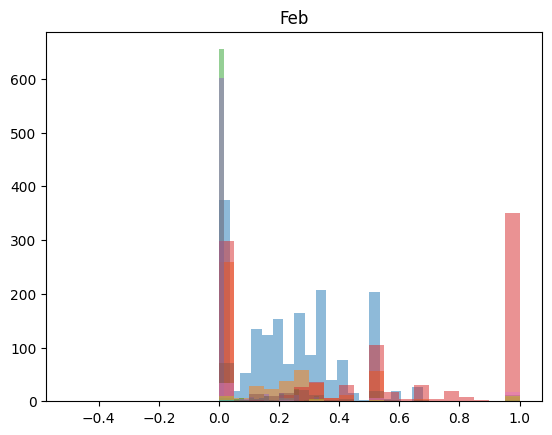

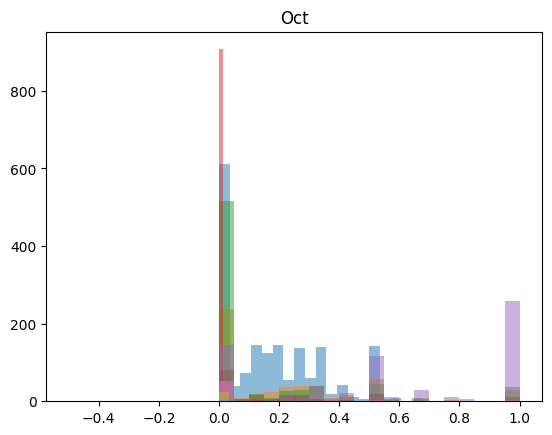

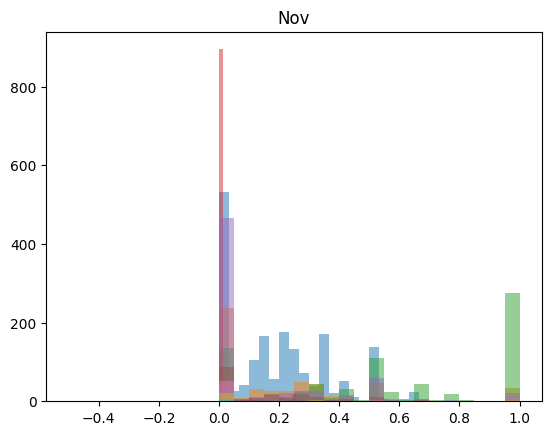

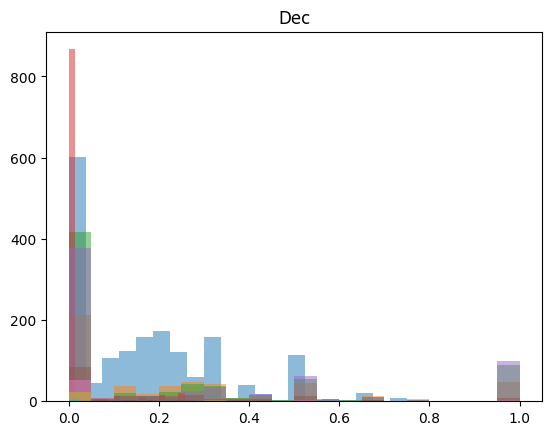

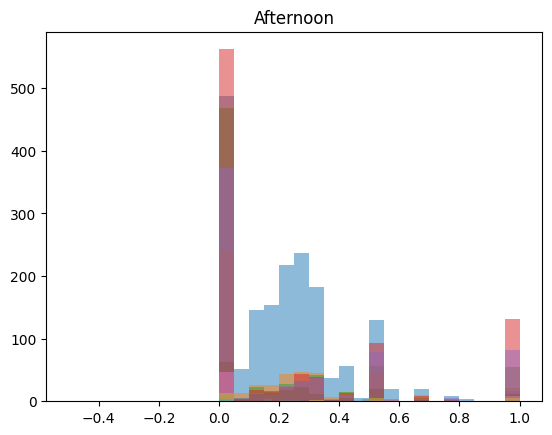

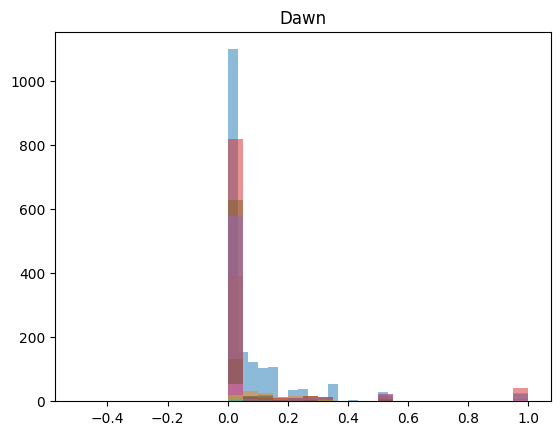

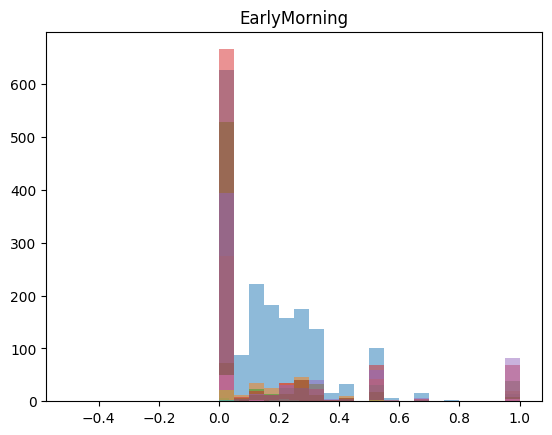

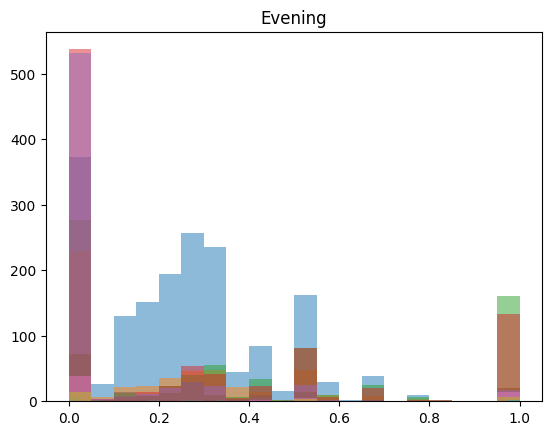

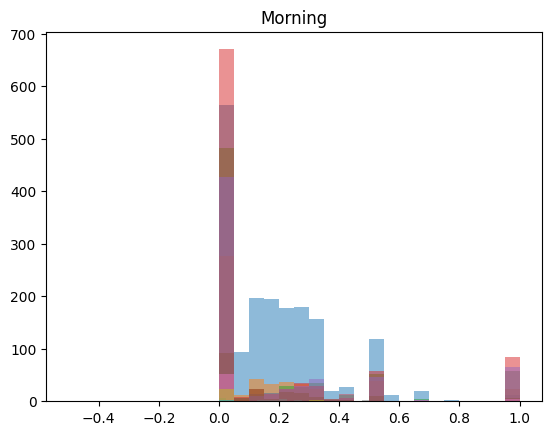

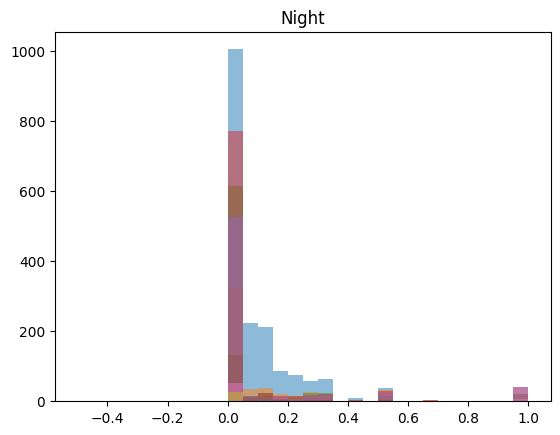

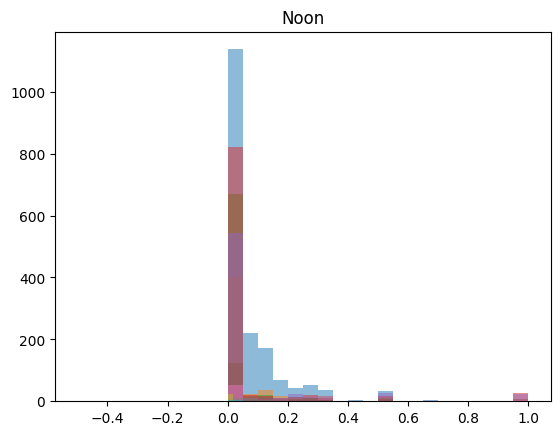

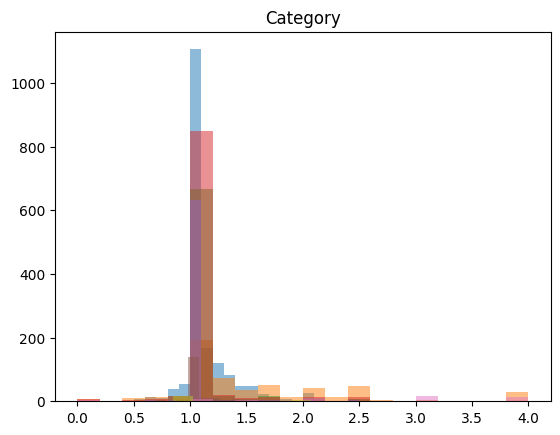

In [91]:
# Visualize the distribution of each feature for each cluster
for column in X.columns:
    if column != "cluster_pca":
        for cluster in X["cluster_pca"].unique():
            cluster_data = X[X["cluster_pca"] == cluster][column]
            plt.hist(cluster_data, bins=20, alpha=0.5)
        plt.title(column)
        plt.show()

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    *YOUR ANSWER HERE*
    K-means assumes that clusters are well separated from each other, meaning there is little overlap between clusters.
    K-means also assumes that each cluster has roughly the same number of samples.
    Judging the cluster sizes alone is not enough to determine if k-means is a good approach, as it depends on the specifics of the data and the problem. Other factors such as the distribution of the data and the presence of noisy or outlier data points can also affect the performance of k-means. 

# Dendrogram Associated for the Agglomerative Hierarchical Clustering

In [106]:
# YOUR CODE HERE
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X_reduced, X_reduced)
print(dist)

[[0.         2.36564448 2.46339936 ... 2.79758143 3.29235081 3.79254326]
 [2.36564448 0.         2.48392248 ... 3.05997018 3.16878443 2.9807993 ]
 [2.46339936 2.48392248 0.         ... 3.51993984 4.50525847 3.37873084]
 ...
 [2.79758143 3.05997018 3.51993984 ... 0.         1.63640378 5.42351743]
 [3.29235081 3.16878443 4.50525847 ... 1.63640378 0.         5.7126815 ]
 [3.79254326 2.9807993  3.37873084 ... 5.42351743 5.7126815  0.        ]]


In [119]:
Z = hierarchy.linkage(obs, 'average')
# Z = hierarchy.linkage(obs, 'single')


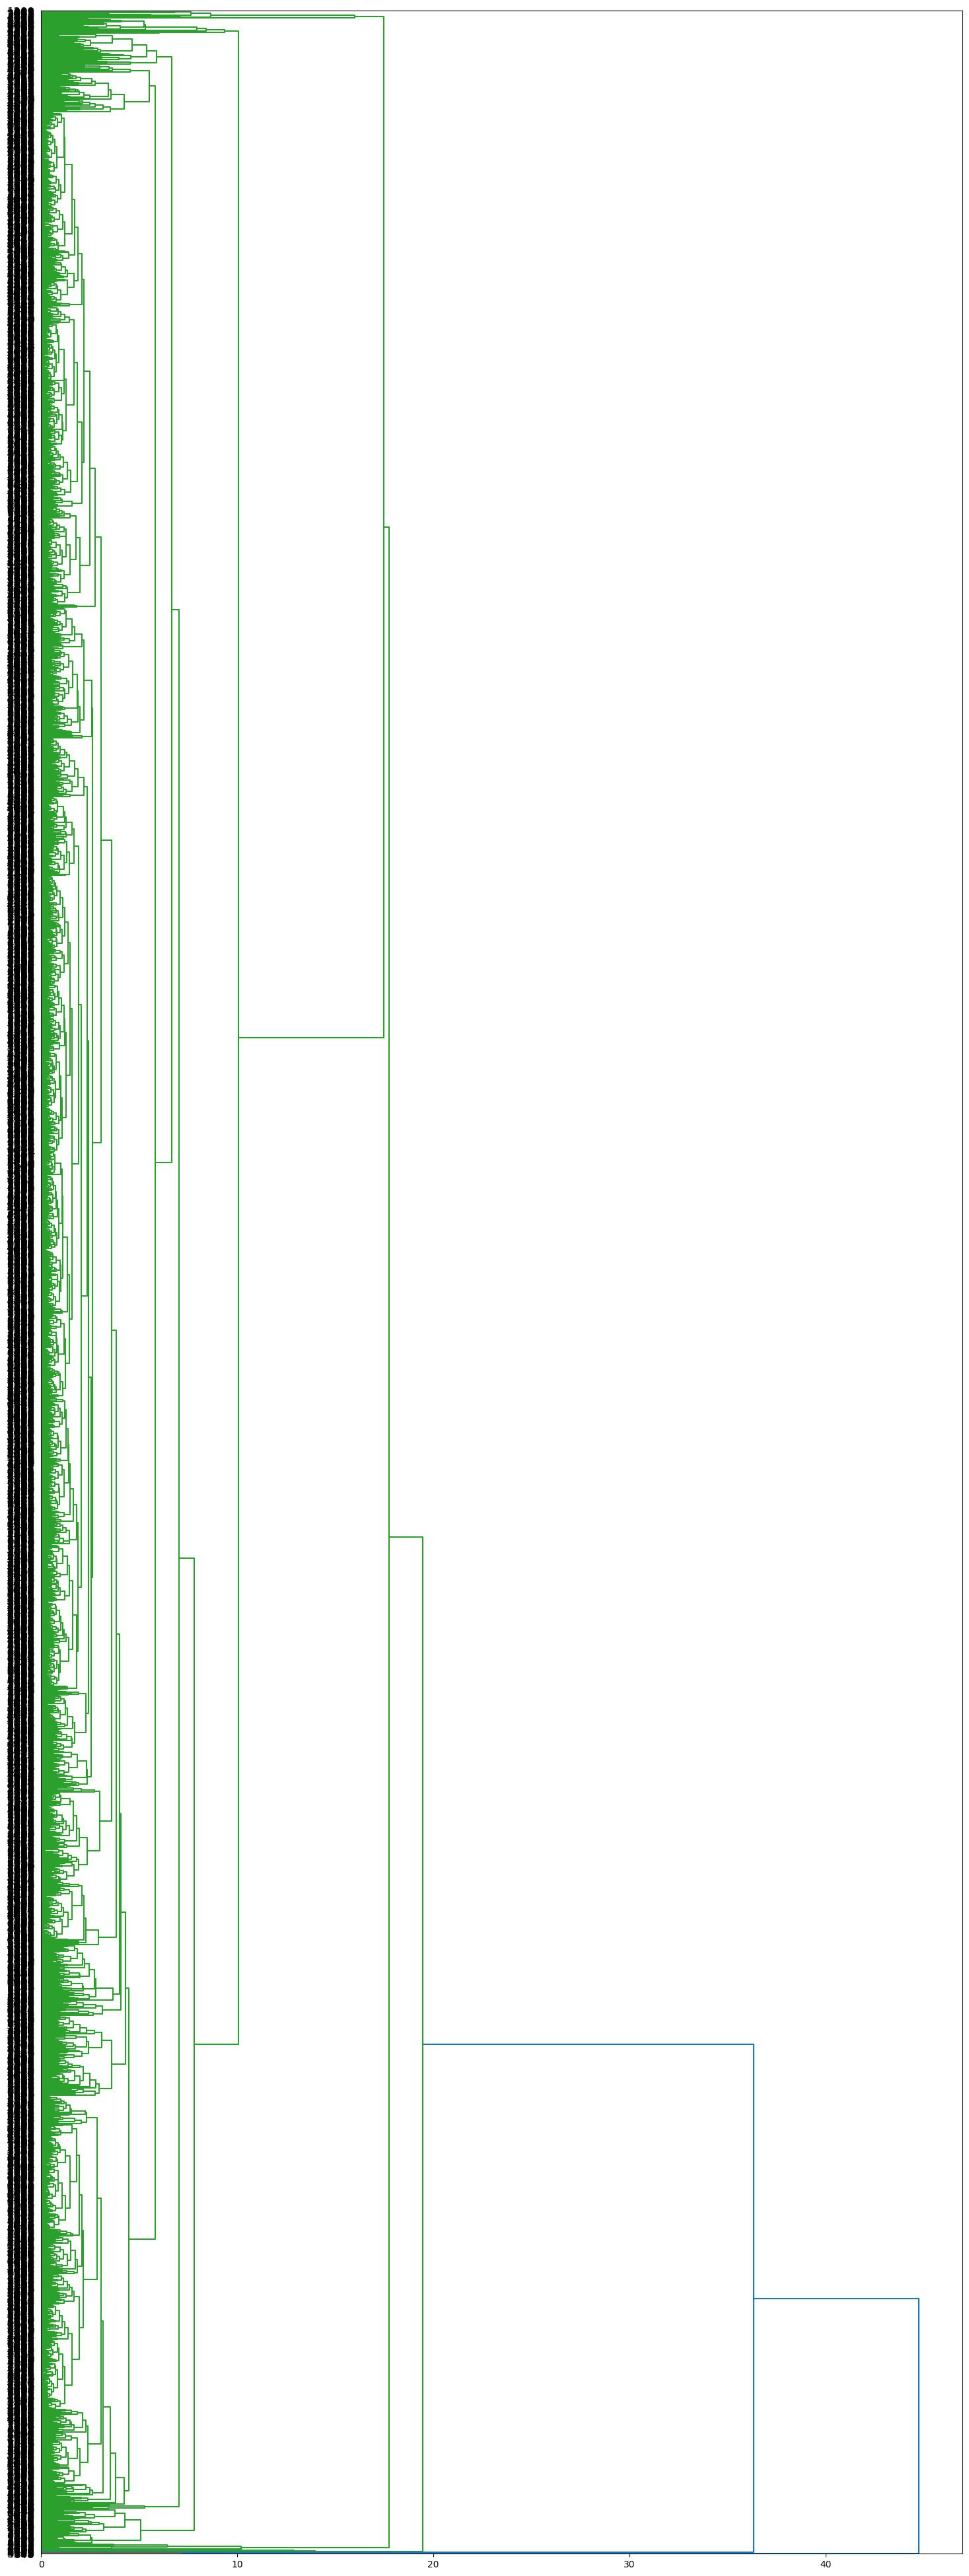

In [120]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

11. Jot down recommendations or followup steps, detailing the reasons.


    *YOUR ANSWER HERE*
    
    The Dendrogram was heavily populated, which likely means that there are many observations in the data even though it's the PCA reduced version of the data . Also the linkage method (complete and average )could be creating many branches in the dendrogram. This can make the dendrogram difficult to read and interpret.

To alleviate this, I tried using a different linkage method  (e.g. "single" or "ward" linkage instead of "average" linkage)


## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [121]:
# YOUR CODE HERE
new = pd.read_csv('../dat/new.csv.gz')

In [ ]:
assert new.shape == (30091, 5)

In [122]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

        *YOUR ANSWER HERE*
        
        This new dataset is a lot larger, about 6 times as large as the past dataset

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [126]:
# YOUR CODE HERE
common_ids = np.intersect1d(past, new)
count = common_ids.shape[0]
count


1834

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [127]:
# YOUR CODE HERE # ~.344
# percentage of values that resulted in purchase
percentage = (new['Purchased?'] == 1).mean() * 100
print(percentage)

34.42557575354757


5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [128]:
past.head()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pca
0,5866936,5.618978e+08,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,...,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0,4
1,5647110,5.326529e+08,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,...,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0,4
2,5790472,4.578109e+08,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,...,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0,4
3,5811598,4.612641e+08,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,...,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0,4
4,5846363,5.157993e+08,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,...,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0,4


In [140]:
# YOUR CODE HERE
X_train = past[['maxPrice', 'minPrice', 'Category']]
# YOUR CODE HERE
X_test=new[['maxPrice', 'minPrice', 'Category']]
# X_train.head()
X_test.head()

,maxPrice,minPrice,Category
0,7.616667,7.616667,1.0
1,6.270000,6.270000,3.0
2,10.008000,10.008000,1.0
3,5.980000,5.980000,2.5
4,26.830000,26.830000,1.0


In [141]:
X_train=X_train.values #to convert to numpy array
X_test=X_test.values

In [137]:
y_train=past['Purchased?']
y_test=new['Purchased?']

In [143]:
y_train=y_train.values #to convert to numpy array
y_test=y_test.values

In [144]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [145]:
# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.96      0.78     19732
           1       0.43      0.06      0.11     10359

    accuracy                           0.65     30091
   macro avg       0.54      0.51      0.44     30091
weighted avg       0.58      0.65      0.55     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [146]:
# YOUR CODE HERE
X = np.concatenate((X_train, X_test), axis=0)
print("Shape of matrix X:", X.shape)

Shape of matrix X: (35091, 3)


In [147]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [148]:
# YOUR CODE HERE
y = np.concatenate((y_train, np.full((X_test.shape[0],), -1, dtype=int)), axis=0)
print("Shape of array y:", y.shape)

Shape of array y: (35091,)


In [149]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [150]:
# YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading

model = LabelSpreading(kernel='knn', alpha=0.01)
model.fit(X, y)

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [151]:
semi_sup_preds = model.transduction_[len(y_train):]# YOUR CODE HERE

In [152]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [153]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     19732
           1       0.81      0.63      0.71     10359

    accuracy                           0.82     30091
   macro avg       0.82      0.78      0.79     30091
weighted avg       0.82      0.82      0.82     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78     19732
           1       0.43      0.06      0.11     10359

    accuracy                           0.65     30091
   macro avg       0.54      0.51      0.44     30091
weighted avg       0.58      0.65      0.55     30091



    *YOUR ANSWER HERE*
    In the semi-supervised learning model, we can see that the precision, recall, and f1-score for both classes 0 and 1 have improved compared to the supervised learning model. The recall score has increased particularly in the class 1, which was the focus of the client. This is likely because the semi-supervised learning model was able to utilize the unlabeled data in X_test to make predictions, while the supervised learning model only used the labeled data in X_train and y_train.

The increased recall score in class 1 can also be attributed to the use of LabelSpreading model instead of the logistic regression used in the supervised learning model. The LabelSpreading model uses a graph-based approach to make predictions, which can help capture complex relationships between the features and target variable, leading to improved performance.

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)